In [1]:
import numpy as np
import pandas as pd
import csv 
import matplotlib.pyplot as plt

import sys 
sys.path.append('/home/lucas/Documents/Log_Analysis')
import analog
from analog import logextract as logextract, logscore as logscore

# Scores Review

In [2]:
# for logs imported with QGC

log_path = '/home/lucas/Documents/Log_Analysis/Vibrations/Bad logs/'
log_file = analog.pathfromQGC(log_path,62)

print(log_file)

/home/lucas/Documents/Log_Analysis/Vibrations/Bad logs//log_62_2018-12-13-10-49-40.ulg


In [3]:
topic_list = 'sensor_combined'
info = logextract(log_file, topic_list)
scores = logscore(info)

acc score : 0.2858471027991044
peak score :0.9996772773076584
hf score : 0.43730804075898966


# Scores Statistics

In [4]:
# Make sure the file is in the right directory
path2csv = 'log_scores.csv'

try:
    csv_file = open(path2csv)
except IOError: 
    print(f'The file {path2csv} does not exist or is not readable. Please verify the path.')

reader = csv.DictReader(csv_file)

acc_score = []
peak_score = []
hf_score = []
for line in reader:
    acc_score.append(float(line['Acc score']))
    peak_score.append(float(line['Peak score']))
    hf_score.append(float(line['HF score']))


In [15]:
acc_bins = np.arange(0,1,0.02)

for k in range(len(acc_bins)):
    if scores["acc_score"] < acc_bins[k+1]:
        print(k)
        bin_index = k
        break

14


Text(0, 0.5, 'Occurences')

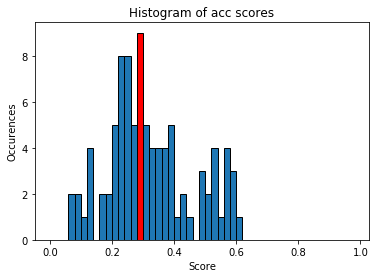

In [16]:
plt.figure()
pdrpm = pd.Series(acc_score)
hist = pdrpm.plot(kind='hist',density=False,bins=acc_bins,edgecolor='k',title='Histogram of acc scores')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted
plt.xlabel('Score')
plt.ylabel('Occurences')

In [17]:
step = .0005
peak_bins = np.arange(0.98,1+step,step)

for k in range(len(peak_bins)):
    if scores["peak_score"] < peak_bins[k]+step:
        print(k)
        bin_index = k
        break
        
len(peak_bins)

39


41

Text(0, 0.5, 'Occurences')

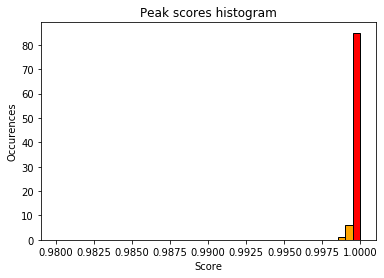

In [18]:
plt.figure()
pdrpm = pd.Series(peak_score)
hist = pdrpm.plot(kind='hist',density=False,bins=peak_bins,edgecolor='k',color='orange',title='Peak scores histogram')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted
plt.xlabel('Score')
plt.ylabel('Occurences')

In [19]:
hf_bins = np.arange(0.35,0.5,.002)

for k in range(len(hf_bins)):
    if scores["hf_score"] < hf_bins[k+1]:
        print(k)
        bin_index = k
        break

43


Text(0, 0.5, 'Occurences')

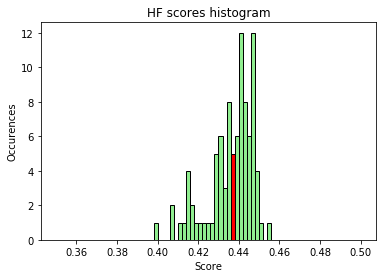

In [21]:
plt.figure()
pdrpm = pd.Series(hf_score)
hist = pdrpm.plot(kind='hist',density=False,bins=hf_bins,edgecolor='k',color='lightgreen',title='HF scores histogram')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted
plt.xlabel('Score')
plt.ylabel('Occurences')